In [36]:
import urllib
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

url = 'https://raw.githubusercontent.com/MargoILIrita/data_analyse_labs/master/telemetry.csv'
data = pandas.read_csv(url, delimiter='\t', index_col=['timestamp'],
                       usecols=['timestamp','nEngine',
                                'rThrottlePedal','pBrakeF','gLat','gLong','Lap', 'sLap',
                                'vCar','NGear', 'NGPSLatitude', 'NGPSLongitude'])

# Данные телеметрии болида Л. Хэмилтона на гонке в Монако в 2011 году
## Средняя скорость в течении гонки

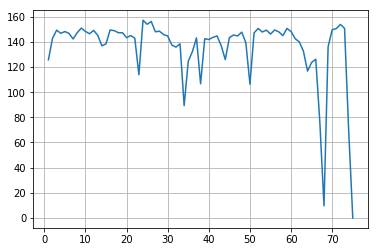

In [18]:
speeds = data.groupby(['Lap'])['vCar'].mean()
plt.plot(speeds, label="speed level")
plt.grid()
plt.show()

## Количество оборотов двигателя в зависимости от передачи

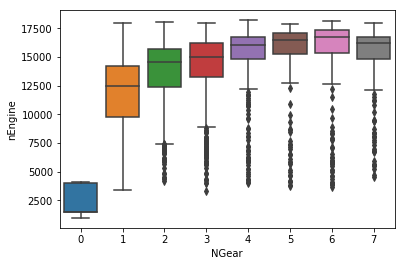

In [11]:
s = sns.boxplot(x='NGear', y='nEngine', data=data)

## Гистограмма усилия в % нажатия педали газа 

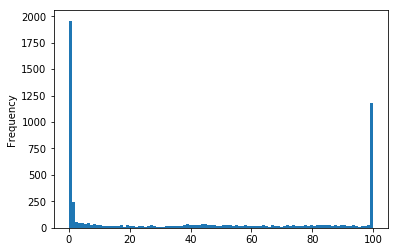

In [28]:
g = data['rThrottlePedal'].plot.hist(bins=101)

## Местоположение болида во время гонки

In [75]:
import plotly as py
import plotly.graph_objs as go

point_lat = []
point_lon = []
for i in range(data['NGPSLatitude'].size):
    a = data['NGPSLatitude'].get_values()[i]
    b = data['NGPSLongitude'].get_values()[i]
    if not (float(a) == 0 or float(b) == 0):
        point_lat.append(data['NGPSLatitude'].get_values()[i])
        point_lon.append(data['NGPSLongitude'].get_values()[i])

points = [ dict(
    type = 'scattergeo',
    lat = point_lat,
    lon = point_lon,
    mode = 'lines',
    line = dict(
        width = 2,
        color = 'blue',
    ),
) ]
    
layout = dict(
        title = 'Race',
        geo = dict(
            center=dict(
                lat=point_lat[0],
                lon=point_lon[0],
            ),
            showland = True,
            showlakes = True,
            landcolor = 'rgb(204, 204, 204)',
            countrycolor = 'rgb(204, 204, 204)',
            lakecolor = 'rgb(255, 255, 255)',
            coastlinewidth = 2,
            lataxis = dict(
                range = [ -1, 60 ],
                showgrid = True,
                tickmode = "linear",
                dtick = 10
            ),
            lonaxis = dict(
                range = [-100, 20],
                showgrid = True,
                tickmode = "linear",
                dtick = 20
            ),
        )
    )
    
fig = dict( data=points, layout=layout )
py.offline.iplot( fig, validate=False, filename='d3-great-circle' )